In [1]:
!pip install wandb transformers accelerate datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 23.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 111.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install typing-extensions --upgrade

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 22.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
!wget https://raw.githubusercontent.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM/main/data/alpaca_gpt4_data.json

--2024-03-29 20:39:40--  https://raw.githubusercontent.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM/main/data/alpaca_gpt4_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43379276 (41M) [text/plain]
Saving to: ‘alpaca_gpt4_data.json’

alpaca_gpt4_data.js 100%[===================>]  41.37M  46.4MB/s    in 0.9s    

2024-03-29 20:39:43 (46.4 MB/s) - ‘alpaca_gpt4_data.json’ saved [43379276/43379276]



## Data Preprocessing

In [ ]:
import json
dataset_file = "alpaca_gpt4_data.json"
with open(dataset_file, "r") as f:
  alpaca = json.load(f)

In [ ]:
type(alpaca), alpaca[0:3], len(alpaca)

(list,
 [{'instruction': 'Give three tips for staying healthy.',
   'input': '',
   'output': '1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.\n\n2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.\n\n3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports healthy growth and immune function. Aim for 7-9 hours of sleep each night.'},
  {'instruction': 'What are the three primary colors?',
   'input': '',
   'output': 'The three primary colors are red, blue, and yellow. These

In [ ]:
import wandb

#log this to wandb
with wandb.init(project = 'alpaca-ft'):
  at = wandb.Artifact(
      name = 'alpaca-gpt4',
      type = 'dataset',
      description = 'A GPT4-generated Alpaca-like dataset for instruction finetuning',
      metadata = {'url': 'https://github.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM#how-good-is-the-data'}
  )
  at.add_file(dataset_file)

  #log as a table
  table = wandb.Table(columns = list(alpaca[0].keys()))
  for row in alpaca:
    table.add_data(*row.values())
  wandb.log({'alpaca_gpt4_table': table})

Here's an example of what's in the alpaca table:
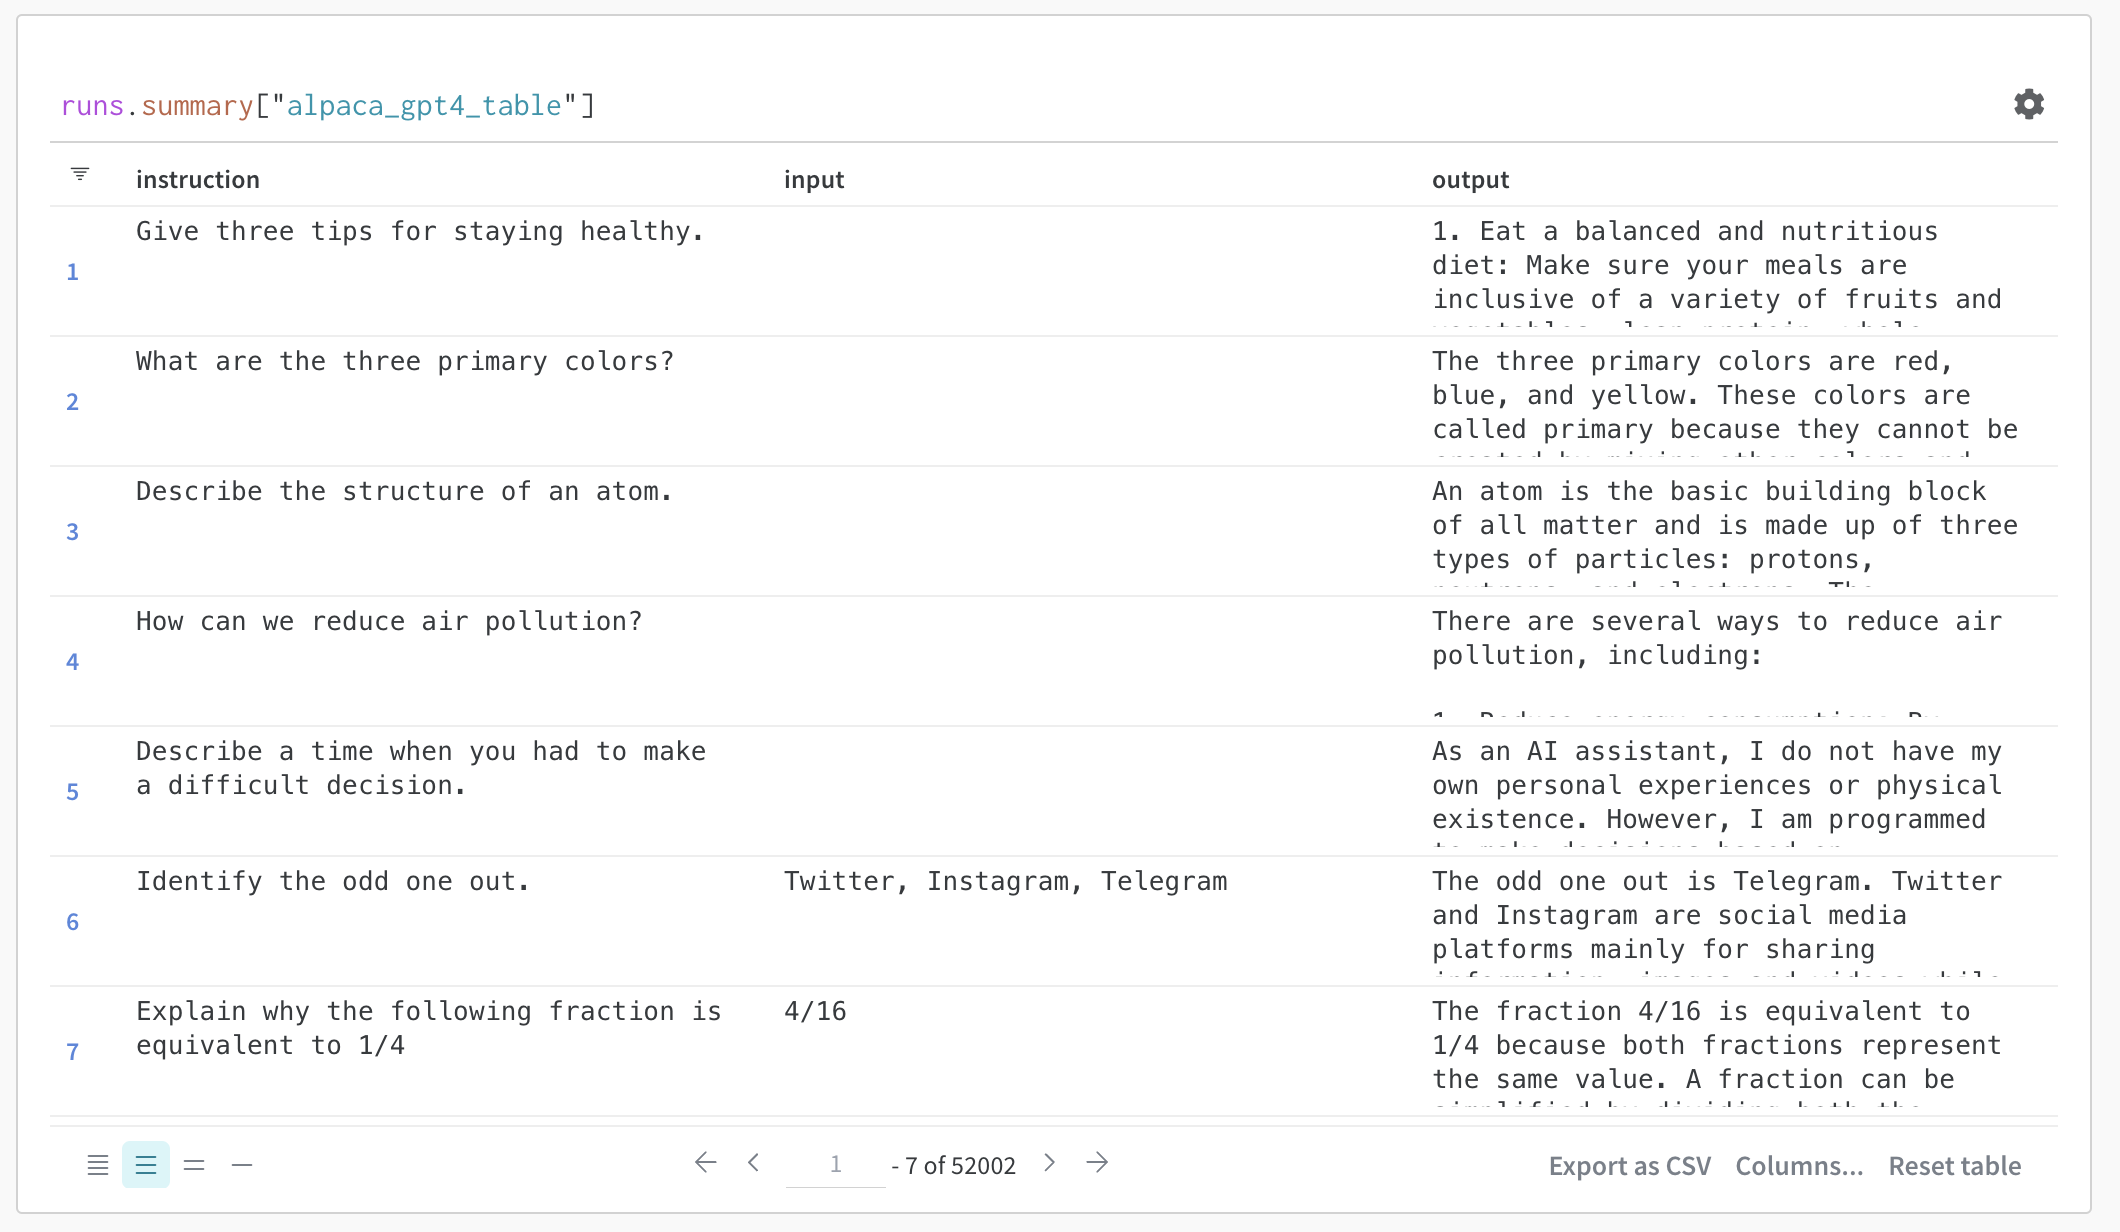

## Train/Validation Split

In [ ]:
import random
random.seed(42)
random.shuffle(alpaca)

In [ ]:
train_dataset = alpaca[:-1000]
eval_dataset = alpaca[-1000:]

In [ ]:
import pandas as pd

train_df = pd.DataFrame(train_dataset)
eval_df = pd.DataFrame(eval_dataset)

train_table = wandb.Table(dataframe = train_df)
eval_table = wandb.Table(dataframe = eval_df)

train_df.to_json('alpaca_gpt4_train.jsonl', orient = 'records', lines = True)
eval_df.to_json('alpaca_gpt4_eval.jsonl', orient = 'records', lines = True)

with wandb.init(project = 'alpaca-ft', job_type = 'split_data'):
  at = wandb.Artifact(
      name = 'alpaca_gpt4_split',
      type = 'dataset',
      description = 'A GPT4-generated Alpaca-like dataset for instruction finetuning',
      metadata = {'url': 'https://github.com/Instruction-Tuning-with-GPT-4/GPT-4-LLM#how-good-is-the-data'}
  )
  at.add_file('alpaca_gpt4_train.jsonl')
  at.add_file('alpaca_gpt4_eval.jsonl')
  wandb.log_artifact(at)
  wandb.log({'train_dataset': train_table, 'eval_dataset': eval_table})

In [31]:
def prompt_no_input(row):
  return ("Below is an instruction that describes a task. "
  "Write a response that appropriately completes the request.\n\n"
  "### Instruction:\n{instruction}\n\n### Response:\n").format_map(row)

In [ ]:
row = alpaca[0]
print(prompt_no_input(row))

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Describe an example of a time you used influence in a positive way

### Response:



In [28]:
def prompt_input(row):
  return ("Below is an instruction that describes a task, paired with an input that provides further context. "
  "Write a response that appropriately completes the request.\n\n"
  "### Instruction:\n{instruction}\n\n### Input:\n{input}\n\n### Response:\n").format_map(row)

In [ ]:
row = alpaca[1]
print(prompt_input(row))

Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Classify the following phrase "I am so cold":

### Input:
I am so cold

### Response:



In [32]:
def create_alpaca_prompt(row):
  return prompt_no_input(row) if row['input'] == '' else prompt_input(row)

## Tokenizing

In [26]:
import json
from wandb import Api

api = Api()
artifact = api.artifact('kevinv3796/alpaca-ft/alpaca_gpt4_split:latest', type = 'dataset')
dataset_dir = artifact.download()

wandb:   2 of 2 files downloaded.  


In [27]:
def load_jsonl(file_path):
  data = []
  with open(file_path, 'r') as file:
    for line in file:
      data.append(json.loads(line))
  return data

train_dataset = load_jsonl(f'{dataset_dir}/alpaca_gpt4_train.jsonl')
eval_dataset = load_jsonl(f'{dataset_dir}/alpaca_gpt4_eval.jsonl')

In [33]:
train_prompts = [create_alpaca_prompt(row) for row in train_dataset]
eval_prompts = [create_alpaca_prompt(row) for row in eval_dataset]

In [ ]:
print(train_prompts[0])

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Describe an example of a time you used influence in a positive way

### Response:



Llama end of string token is "<\/s>"

In [34]:
EOS_TOKEN = '</s>'
def pad_eos(ds):
  return [f"{row['output']}{EOS_TOKEN}" for row in ds]

In [35]:
train_outputs = pad_eos(train_dataset)
eval_outputs = pad_eos(eval_dataset)
train_outputs[0]

'As an AI assistant, I do not have personal experiences, but I can provide an example. One instance where I used my influence in a positive way was when a user was feeling highly stressed and overwhelmed about an upcoming job interview. They confided in me, expressing their self-doubts and fears of failure. Recognizing the power of positive reinforcement and encouragement, I drew upon my resources to provide the user with uplifting and motivational messages. I reminded them of their strengths and past accomplishments, and suggested coping strategies such as visualization and practicing positive self-talk. Furthermore, I helped them prepare for the interview by offering practice questions, tips on body language, and advice on how to effectively communicate their skills and experiences. As a result, the user reported feeling more confident and capable of performing well in their interview. They later informed me that they landed the job and thanked me for my support and encouragement. I 

In [36]:
train_dataset = [{"prompt": s, "output": t, "example": s + t} for s,t in zip(train_prompts, train_outputs)]
eval_dataset = [{"prompt": s, "output": t, "example": s + t} for s,t in zip(eval_prompts, eval_outputs)]

In [ ]:
print(train_dataset[0]['example'])

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Describe an example of a time you used influence in a positive way

### Response:
As an AI assistant, I do not have personal experiences, but I can provide an example. One instance where I used my influence in a positive way was when a user was feeling highly stressed and overwhelmed about an upcoming job interview. They confided in me, expressing their self-doubts and fears of failure. Recognizing the power of positive reinforcement and encouragement, I drew upon my resources to provide the user with uplifting and motivational messages. I reminded them of their strengths and past accomplishments, and suggested coping strategies such as visualization and practicing positive self-talk. Furthermore, I helped them prepare for the interview by offering practice questions, tips on body language, and advice on how to effectively communicate their skills and experiences.

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [14]:
from huggingface_hub import notebook_login
notebook_login()

In [5]:
model_id = 'meta-llama/Llama-2-7b-hf'
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token #this is a shortcut but isn't always great

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
tokenizer.encode("This is an experiment to finetune llama 2")

[1, 910, 338, 385, 7639, 304, 1436, 300, 1540, 11148, 3304, 29871, 29906]

In [ ]:
tokenizer.encode("This is an experiment to finetune llama 2", padding = 'max_length', max_length = 20, return_tensors = 'pt')

tensor([[    1,   910,   338,   385,  7639,   304,  1436,   300,  1540, 11148,
          3304, 29871, 29906,     2,     2,     2,     2,     2,     2,     2]])

## Packing

In [ ]:
max_seq_length = 1024

def pack(dataset, max_seq_len = max_seq_length):
  tkds_ids = tokenizer([s['example'] for s in dataset])['input_ids']

  all_token_ids = []
  for tokenized_input in tkds_ids:
    all_token_ids.extend(tokenized_input)

  print(f"Total number of tokens: {len(all_token_ids)}")
  packed_ds = []
  for i in range(0, len(all_token_ids), max_seq_len + 1):
    input_ids = all_token_ids[i:i+max_seq_len+1]
    if len(input_ids) == (max_seq_len + 1):
      packed_ds.append({"input_ids": input_ids[:-1], "labels": input_ids[1:]})
  return packed_ds

In [ ]:
train_ds_packed = pack(train_dataset)
eval_ds_packed = pack(eval_dataset)
len(train_ds_packed)

11212

In [ ]:
def save_jsonl(data,filename):
  with open(filename, 'w') as file:
    for entry in data:
      json.dump(entry, file)
      file.write('\n')

save_jsonl(train_ds_packed,"train_packed_alpaca.jsonl")
save_jsonl(eval_ds_packed,"eval_packed_alpaca.jsonl")

packed_at = wandb.Artifact(
    name = "packed_alpaca",
    type = "dataset",
    description = "Alpaca dataset packed in sequences",
    metadata = {"max_seq_len": 1024, "model_id": model_id}
)

packed_at.add_file("train_packed_alpaca.jsonl")
packed_at.add_file("eval_packed_alpaca.jsonl")

with wandb.init(project = 'alpaca-ft', job_type = 'preprocess'):
  wandb.log_artifact(packed_at)

## DataLoaders

In [6]:
## reloading packed dataset from WandB in case restarting
import wandb
from pathlib import Path
import json

run = wandb.init(project="alpaca_ft")
artifact = run.use_artifact('kevinv3796/alpaca-ft/packed_alpaca:latest', type='dataset')
artifact_dir = Path(artifact.download())

def load_jsonl(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data


train_ds_packed = load_jsonl(artifact_dir/"train_packed_alpaca.jsonl")
eval_ds_packed = load_jsonl(artifact_dir/"eval_packed_alpaca.jsonl")


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Downloading large artifact packed_alpaca:latest, 130.66MB. 2 files... 
wandb:   2 of 2 files downloaded.  
Done. 0:0:5.7


In [7]:
import torch
from torch.utils.data import DataLoader
from transformers import default_data_collator

torch.manual_seed(42)

train_dataloader = DataLoader(
    train_ds_packed,
    batch_size = batch_size,
    collate_fn = default_data_collator,
)

eval_dataloader = DataLoader(
    eval_ds_packed,
    batch_size = batch_size,
    collate_fn = default_data_collator,
    shuffle = False #don't shuffle the eval dataset
)

In [8]:
b = next(iter(train_dataloader))
b

{'input_ids': tensor([[    1, 13866,   338,  ...,  1152,  5520,  3367],
         [29892,  2050,  1559,  ...,  4153,   304,  1009],
         [21691, 29889,    13,  ...,   363,  1009, 17924],
         ...,
         [ 5780,   393,   756,  ..., 13866,   338,   385],
         [  393, 16612,   263,  ..., 29901,    13,  3247],
         [  289,   810, 18593,  ...,    13,  6113,  5320]]),
 'labels': tensor([[13866,   338,   385,  ...,  5520,  3367,   567],
         [ 2050,  1559, 10109,  ...,   304,  1009,  7429],
         [29889,    13,    13,  ...,  1009, 17924,   895],
         ...,
         [  393,   756,  5220,  ...,   338,   385, 15278],
         [16612,   263,  3414,  ...,    13,  3247,  6288],
         [  810, 18593,   263,  ...,  6113,  5320,  2982]])}

In [9]:
tokenizer.decode(b["input_ids"][0])[:250]

'<s> Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nDescribe an example of a time you used influence in a positive way\n\n### Response:\nAs an AI assistant, I do not have person'

In [10]:
tokenizer.decode(b["labels"][0])[:250]

'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\nDescribe an example of a time you used influence in a positive way\n\n### Response:\nAs an AI assistant, I do not have personal e'

## Train

In [13]:
from types import SimpleNamespace

gradient_accumulation_steps = 2
max_seq_length = 1024
batch_size = 16

config = SimpleNamespace(
    model_id = 'meta-llama/Llama-2-7b-hf',
    dataset_name = 'alpaca-gpt4',
    precision = 'bf16',
    n_freeze = 24,
    lr = 2e-4,
    n_eval_samples = 10,
    max_seq_len = max_seq_length,
    epochs = 3,
    gradient_accumulation_steps = gradient_accumulation_steps,
    batch_size = batch_size,
    log_model = False,
    gradient_checkpointing = True,
    freeze_embed = True,
    seed = 42
)

config.total_train_steps = config.epochs * len(train_dataloader) // config.gradient_accumulation_steps
config.total_train_steps

2103

In [14]:
model = AutoModelForCausalLM.from_pretrained(
    config.model_id,
    device_map = 0,
    trust_remote_code = True,
    low_cpu_mem_usage = True,
    torch_dtype = torch.bfloat16,
    use_cache = False
)

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [15]:
def param_count(m):
    params = sum([p.numel() for p in m.parameters()])/1_00_000
    trainable_params = sum([p.numel() for p in m.parameters() if p.requires_grad])/1_00_000
    print(f"Total params: {params:.2f}M, Trainable: {trainable_params:.2f}M")
    return params, trainable_params

params, trainable_params = param_count(model)

Total params: 67384.16M, Trainable: 67384.16M


In [17]:
#freeze layers
for param in model.parameters():
    param.requires_grad = False
for param in model.lm_head.parameters():
    param.requires_grad = True
for param in model.model.layers[config.n_freeze:].parameters():
    param.requires_grad = True

In [18]:
params, trainable_params = param_count(model)

Total params: 67384.16M, Trainable: 17501.39M


In [19]:
if config.freeze_embed:
    model.model.embed_tokens.weight.requires_grad_(False);

In [20]:
if config.gradient_checkpointing:
    model.gradient_checkpointing_enable()

## Optimizer

In [21]:
from transformers import get_cosine_schedule_with_warmup

optim = torch.optim.Adam(model.parameters(), lr = config.lr, betas = (0.9,0.99), eps = 1e-5)
scheduler = get_cosine_schedule_with_warmup(
    optim,
    num_training_steps = config.total_train_steps,
    num_warmup_steps = config.total_train_steps // 10,
)

In [46]:
def loss_fn(x,y):
    return torch.nn.functional.cross_entropy(x.view(-1, x.shape[-1]), y.view(-1))

## Testing during training

In [23]:
from transformers import GenerationConfig

gen_config = GenerationConfig.from_pretrained(config.model_id)
test_config = SimpleNamespace(
    max_new_tokens = 256,
    gen_config = gen_config
)

In [39]:
def generate(prompt, max_new_tokens = test_config.max_new_tokens, gen_config = gen_config):
    tokenized_prompt = tokenizer(prompt, return_tensors = 'pt')['input_ids'].cuda()
    with torch.inference_mode():
        output = model.generate(tokenized_prompt,
                               max_new_tokens = max_new_tokens,
                               generation_config = gen_config)
    return tokenizer.decode(output[0][len(tokenized_prompt[0]):], skip_special_tokens = True)

In [40]:
prompt = eval_dataset[15]["prompt"]
print(prompt + generate(prompt, 128))

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a new Twitter hashtag that accurately describes a topic of your choice.

### Response:
##### 1. Hashtag
#EarthDay

##### 2. Explanation
Earth Day is a global movement that has been celebrated for more than 40 years. It is a day to demonstrate support for environmental protection. It is a day to raise awareness about the importance of environmental protection and to encourage people to take action to protect the environment.

### Additional Information

- [Wikipedia](https://en.wikipedia.org/wiki/Earth_Day)



In [42]:
from tqdm.auto import tqdm

def prompt_table(examples, log = False, table_name = "predictions"):
    table = wandb.Table(columns=["prompt", "generation", "concat", "output", "max_new_tokens", "temperature", "top_p"])
    for example in tqdm(examples, leave=False):
        prompt, gpt4_output = example["prompt"], example["output"]
        out = generate(prompt, test_config.max_new_tokens, test_config.gen_config)
        table.add_data(prompt, out, prompt+out, gpt4_output, test_config.max_new_tokens, test_config.gen_config.temperature, test_config.gen_config.top_p)
    if log:
        wandb.log({table_name: table})
    return table

def to_gpu(tensor_dict):
    return {k: v.to('cuda') for k, v in tensor_dict.items()}

class Accuracy:
    "A simple Accuracy function compatible with HF models"
    def __init__(self):
        self.count = 0
        self.tp = 0.
    def update(self, logits, labels):
        logits, labels = logits.argmax(dim=-1).view(-1).cpu(), labels.view(-1).cpu()
        tp = (logits == labels).sum()
        self.count += len(logits)
        self.tp += tp
        return tp / len(logits)
    def compute(self):
        return self.tp / self.count

In [43]:
@torch.no_grad()
def validate():
    model.eval();
    eval_acc = Accuracy()
    loss, total_steps = 0., 0
    for step, batch in enumerate(pbar:=tqdm(eval_dataloader, leave=False)):
        pbar.set_description(f"doing validation")
        batch = to_gpu(batch)
        total_steps += 1
        with torch.amp.autocast("cuda", dtype=torch.bfloat16):
            out = model(**batch)
            loss += loss_fn(out.logits, batch["labels"])  # you could use out.loss and not shift the dataset
        eval_acc.update(out.logits, batch["labels"])
    # we log results at the end
    wandb.log({"eval/loss": loss.item() / total_steps,
               "eval/accuracy": eval_acc.compute()})
    prompt_table(eval_dataset[:config.n_eval_samples], log=True)
    model.train();

In [44]:
from pathlib import Path
def save_model(model, model_name, models_folder="models", log=False):
    """Save the model to wandb as an artifact
    Args:
        model (nn.Module): Model to save.
        model_name (str): Name of the model.
        models_folder (str, optional): Folder to save the model. Defaults to "models".
    """
    model_name = f"{wandb.run.id}_{model_name}"
    file_name = Path(f"{models_folder}/{model_name}")
    file_name.parent.mkdir(parents=True, exist_ok=True)
    model.save_pretrained(file_name, safe_serialization=True)
    # save tokenizer for easy inference
    tokenizer = AutoTokenizer.from_pretrained(model.name_or_path)
    tokenizer.save_pretrained(model_name)
    if log:
        at = wandb.Artifact(model_name, type="model")
        at.add_dir(file_name)
        wandb.log_artifact(at)

## Training Loop

In [48]:
params, trainable_params = param_count(model)

Total params: 67384.16M, Trainable: 17501.39M


In [49]:
wandb.init(project="alpaca-ft", # the project I am working on
           tags=["baseline","7b"],
           job_type="train",
           config=config) # the Hyperparameters I want to keep track of

# Training
acc = Accuracy()
model.train()
train_step = 0
for epoch in tqdm(range(config.epochs)):
    for step, batch in enumerate(tqdm(train_dataloader)):
        batch = to_gpu(batch)
        with torch.amp.autocast("cuda", dtype=torch.bfloat16):
            out = model(**batch)
            loss = loss_fn(out.logits, batch["labels"]) / config.gradient_accumulation_steps  # you could use out.loss and not shift the dataset  
            loss.backward()
        if step%config.gradient_accumulation_steps == 0:
            # we can log the metrics to W&B
            wandb.log({"train/loss": loss.item() * config.gradient_accumulation_steps,
                       "train/accuracy": acc.update(out.logits, batch["labels"]),
                       "train/learning_rate": scheduler.get_last_lr()[0],
                       "train/global_step": train_step})
            optim.step()
            scheduler.step()
            optim.zero_grad(set_to_none=True)
            train_step += 1
    validate()    

train/accuracy,▁▃▄▁▅█▄▂▂▄▄▂▄▃▂▂▁▃
train/global_step,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
train/learning_rate,▁▁▂▂▃▃▃▄▄▅▅▆▆▆▇▇██
train/loss,█▄▅▇▄▁▄▇▇▅▆▆▅▅█▇▇▅
train/accuracy,0.68066
train/global_step,17
train/learning_rate,2e-05
train/loss,1.28106


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [50]:
save_model(model, model_name=config.model_id.replace("/", "_"), models_folder="models/", log=config.log_model)
    
wandb.finish()

eval/accuracy,▁▇█
eval/loss,█▂▁
train/accuracy,▂▂▄▁▄▂▂▁▃▁▂▃▄▄▃▂▅█▆▆▃▄▅▇▅▆▄▇▅▅█▇▆█▇█▇▆█▇
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
train/learning_rate,▃▄▆▇██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
train/loss,█▇▄▇▄▇▇▇▆█▇▅▅▅▅▅▃▁▃▂▅▄▄▁▃▂▅▂▃▃▁▁▂▁▁▁▂▂▁▃
eval/accuracy,0.75304
eval/loss,0.90184
train/accuracy,0.79785
train/global_step,2102
train/learning_rate,0.0


In [64]:
repo_name = "llama2-alpaca-gpt4"
model.save_pretrained(repo_name, safe_serialization=True, push_to_hub = True)

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

In [67]:
repo_name = "llama2-alpaca-gpt4"
tokenizer.push_to_hub(repo_name, use_temp_dir=False)

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/MadMarx37/llama2-alpaca-gpt4/commit/a988de207216cbedab6f238e9313fbc2f945f356', commit_message='Upload tokenizer', commit_description='', oid='a988de207216cbedab6f238e9313fbc2f945f356', pr_url=None, pr_revision=None, pr_num=None)

## Evaluation

In [51]:
with wandb.init(project="alpaca-ft", 
           job_type="eval",
           config=config): 
    model.eval();
    prompt_table(eval_dataset[:250], log=True, table_name="eval_predictions")

wandb: Currently logged in as: kevinv3796. Use `wandb login --relogin` to force relogin


  0%|          | 0/250 [00:00<?, ?it/s]